In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [624]:
train = pd.read_csv("C:\\Users\\Prati\\Desktop\\train_yaOffsB.csv")

In [625]:
train.shape

(88858, 10)

In [626]:
train.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [627]:
train.isnull().sum()  #as Number_Weeks_used has 9000 Nan values, we can't drop it

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

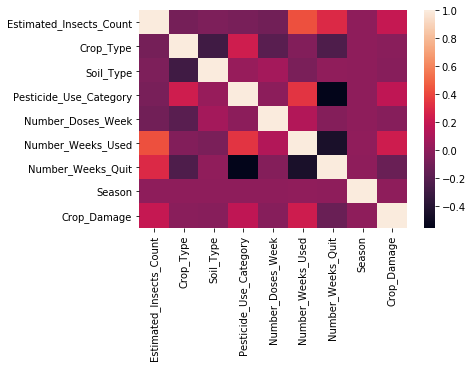

In [628]:
sns.heatmap(train.corr())

# SVM

In [503]:
from sklearn.svm import SVC
from sklearn import svm, decomposition, preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report

In [504]:
train = pd.read_csv("C:\\Users\\Prati\\Desktop\\train_yaOffsB.csv")

In [505]:
x = train.drop( 'Crop_Damage',axis=1)

In [506]:
x = x.drop('ID',axis=1)

In [507]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3
88854,3516,1,0,2,10,20.0,38,1
88855,3516,1,0,2,15,40.0,8,2
88856,3702,1,0,2,10,25.0,18,3


In [508]:
y = train['Crop_Damage']

In [509]:
x.fillna(0,inplace=True)

In [511]:
x =np.asarray(x)
y =np.asarray(y)

In [512]:
test = pd.read_csv("C:\\Users\\Prati\\Desktop\\test_pFkWwen.csv")
test.fillna(0,inplace=True)

In [513]:
test = test.drop('ID',axis=1)

In [514]:
test = np.asarray(test)

In [515]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,shuffle=True)

In [516]:
model = SVC(decision_function_shape='ovo')

In [517]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf = OneVsRestClassifier(LinearSVC())
clf.fit(x_train, y_train)

C:\Users\Prati\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Prati\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Prati\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [518]:
y_pred = clf.predict(x_test)

In [523]:
y_pred[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

### Gives an accuacy of 84%

In [522]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22299     4     0]
 [ 3680    19     0]
 [  652     4     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     22303
           1       0.70      0.01      0.01      3699
           2       0.00      0.00      0.00       656

    accuracy                           0.84     26658
   macro avg       0.51      0.33      0.31     26658
weighted avg       0.80      0.84      0.76     26658



C:\Users\Prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [292]:
pred = clf.predict(test)

## One v/s Rest classifier

In [591]:
train = pd.read_csv("C:\\Users\\Prati\\Desktop\\train_yaOffsB.csv")
test = pd.read_csv("C:\\Users\\Prati\\Desktop\\test_pFkWwen.csv")

In [592]:
x = train.drop( 'Crop_Damage',axis=1)

In [593]:
x = x.drop('ID',axis=1)

In [594]:
x.fillna(0,inplace=True)


In [595]:
y = train['Crop_Damage']

In [529]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
dnns_classifier.fit(np.array(x_train),y_train )
dnns_predictions_labels = dnns_classifier.predict((x_test))

### Gives an accuracy of 84%

In [530]:
print(classification_report(dnns_predictions_labels,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     26274
           1       0.07      0.65      0.12       384
           2       0.00      0.00      0.00         0

    accuracy                           0.84     26658
   macro avg       0.35      0.50      0.35     26658
weighted avg       0.98      0.84      0.90     26658



C:\Users\Prati\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [531]:
dnns_predictions_labels[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [596]:
test.fillna(0,inplace=True)

In [597]:
test = test.drop('ID',axis=1)

In [536]:
pred = dnns_classifier.predict(test)

In [539]:


sub_dnns = pd.DataFrame(test['ID'])

sub_dnns['Crop_Damage']=pred

sub_dnns.to_csv('sub_dnns.csv',index=False)

# XGB boost

In [548]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [557]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [562]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit((x_train), y_train)
xbg_predictions_labels = xgb_classifier.predict(x_test)

In [564]:
xbg_predictions_labels[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

### Gives an accuracy of 85%

In [565]:
print(classification_report(y_test,xbg_predictions_labels))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     22353
           1       0.50      0.20      0.28      3628
           2       0.20      0.01      0.02       677

    accuracy                           0.85     26658
   macro avg       0.52      0.39      0.41     26658
weighted avg       0.80      0.85      0.81     26658



In [566]:
pred = xgb_classifier.predict(test)

In [569]:
sub_xgb = pd.DataFrame(test['ID'])

sub_xgb['Crop_Damage']=pred

sub_xgb.to_csv('sub_xgb.csv',index=False)